<a href="https://colab.research.google.com/github/Swarup2608/Plant_Disease_Detection_Using_ML_With_Deployment/blob/main/Diseased_Plant_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

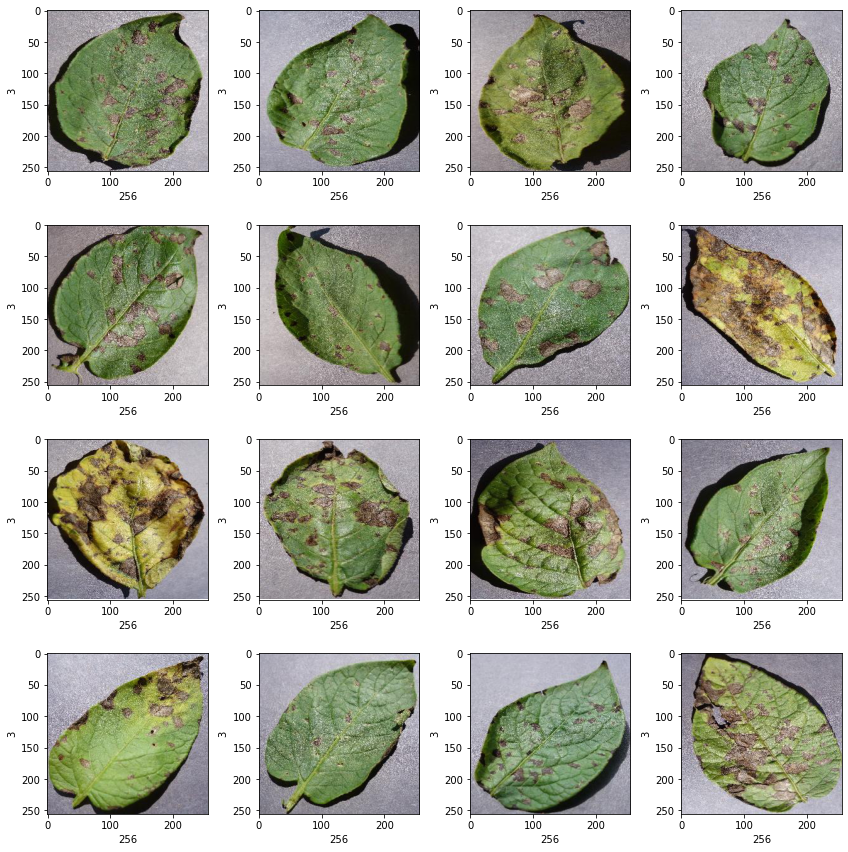

In [ ]:
plt.figure(figsize=(12,12))
path = "./drive/MyDrive/Plant_images_pianalytix/Potato___Early_blight/"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    read_img = imread(path+random.choice(sorted(os.listdir(path))))
    plt.imshow(read_img)
    plt.xlabel(read_img.shape[1],fontsize=10) #Width of the image
    plt.ylabel(read_img.shape[2],fontsize=10) #Height of the image

In [ ]:
# Now convert the images to the arrays
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "./drive/MyDrive/Plant_images_pianalytix/"
root_dir = listdir(dir)
images_list,label_list = [],[]
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    images_path = f"{dir}/{directory}/{files}"
    images_list.append(convert_image_to_array(images_path))
    label_list.append(binary_labels[temp])

In [ ]:
# Visualize the number of classes count
# To check if dataset is balanced or not
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [ ]:
images_list[0].shape
# Here 3 is the RGB colors

(256, 256, 3)

In [ ]:
# Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
# Next we will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.
x_train, x_test, y_train, y_test = train_test_split(images_list, label_list, test_size=0.2, random_state = 10) 

In [ ]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

We have used different types of layers according to their features namely Conv_2d which is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor, max_pooling2d which is a downsampling technique which takes out the maximum value over the window defined by poolsize, flatten which flattens the input and creates a 1D output, Dense which produces the output as the dot product of input and kernel.

In [ ]:
# Creating the sequential conv2D, Dense Neural Network and in final we have 3 layers as it has 3 classes
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [ ]:
# We will compile the model with loss of categorical_crossentrophy as we are dealing with classification problems
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 35s 7s/step - loss: 1.0446 - accuracy: 0.4010 - val_loss: 1.0070 - val_accuracy: 0.4375
Epoch 2/50
5/5 [==============================] - 29s 6s/step - loss: 0.9571 - accuracy: 0.6163 - val_loss: 0.8876 - val_accuracy: 0.6944
Epoch 3/50
5/5 [==============================] - 41s 9s/step - loss: 0.8644 - accuracy: 0.6632 - val_loss: 0.7843 - val_accuracy: 0.6944
Epoch 4/50
5/5 [==============================] - 29s 6s/step - loss: 0.7625 - accuracy: 0.6649 - val_loss: 0.6735 - val_accuracy: 0.6944
Epoch 5/50
5/5 [==============================] - 29s 6s/step - loss: 0.6609 - accuracy: 0.6684 - val_loss: 0.5626 - val_accuracy: 0.7153
Epoch 6/50
5/5 [==============================] - 29s 6s/step - loss: 0.5610 - accuracy: 0.8177 - val_loss: 0.4753 - val_accuracy: 0.7986
Epoch 7/50
5/5 [==============================] - 30s 6s/step - loss: 0.4698 - accuracy: 0.8490 - val_loss: 0.3830 - val_accuracy: 0.9722
Epoch 8/50
5/5 [==================

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 507ms/step - loss: 0.0276 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 3s 510ms/step


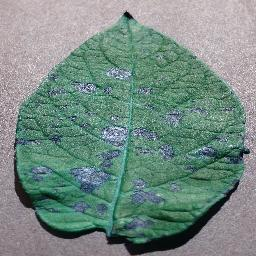

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[20])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[20])])
print("Predicted : ",all_labels[np.argmax(y_pred[20])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


In [ ]:
model.save("plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('plant_model_weights.h5')